<a href="https://colab.research.google.com/github/SaeidShamsaliei/worksheets-examples/blob/master/Evaluation_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import os
import matplotlib.pyplot as plt
import sys
import keras
import pandas as pd
import numpy as np
from keras.datasets import mnist

#Load the MNIST

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() 

In [0]:
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

#Load the CSV files

In [0]:
# the directory in which results are stored
main_folder = "/content/drive/My Drive/AI reproducibility/Machine Learning Platform/results"

In [101]:
#getting the test labels
file_name_test = main_folder + "/" + "mnist_test.csv"
test_data = np.loadtxt(file_name_test, dtype="int", delimiter=",", skiprows=1)
test_labels = test_data[:,0]
print(test_labels)

[7 2 1 ... 4 5 6]


In [0]:
platform_folder_comet = "comet.ml"
platform_folder_coda = "codalab"
platform_folder_floyd = "floydhub"
platform_folder_kaggle = "kaggle"

In [0]:
experiment_folder1 = "CPU"
experiment_folder2 = "GPU"
seed_folder1 = "seed"
seed_folder2 = "no seed"

In [0]:
folder_dir1_kaggle = main_folder+ "/" + platform_folder_kaggle + "/" + seed_folder1 + "/" + experiment_folder1
folder_dir2_kaggle = main_folder+ "/" + platform_folder_kaggle + "/" + seed_folder1 + "/" + experiment_folder2
folder_dir3_kaggle = main_folder+ "/" + platform_folder_kaggle + "/" + seed_folder2 + "/" + experiment_folder1
folder_dir4_kaggle = main_folder+ "/" + platform_folder_kaggle + "/" + seed_folder2 + "/" + experiment_folder2

folder_dir1_floyd = main_folder+ "/" + platform_folder_floyd + "/" + seed_folder1 + "/" + experiment_folder1
folder_dir2_floyd = main_folder+ "/" + platform_folder_floyd + "/" + seed_folder1 + "/" + experiment_folder2
folder_dir3_floyd = main_folder+ "/" + platform_folder_floyd + "/" + seed_folder2 + "/" + experiment_folder1
folder_dir4_floyd = main_folder+ "/" + platform_folder_floyd + "/" + seed_folder2 + "/" + experiment_folder2

folder_dir1_coda = main_folder+ "/" + platform_folder_coda + "/" + seed_folder1 + "/" + experiment_folder1
folder_dir2_coda = main_folder+ "/" + platform_folder_coda + "/" + seed_folder1 + "/" + experiment_folder2
folder_dir3_coda = main_folder+ "/" + platform_folder_coda + "/" + seed_folder2 + "/" + experiment_folder1
folder_dir4_coda = main_folder+ "/" + platform_folder_coda + "/" + seed_folder2 + "/" + experiment_folder2

# cometml on cpu and gpu like the rest of the experiments
folder_dir1_comet_norm = main_folder+ "/" + platform_folder_comet + "/" + seed_folder1 + "/" + experiment_folder1
folder_dir2_comet_norm = main_folder+ "/" + platform_folder_comet + "/" + seed_folder1 + "/" + experiment_folder2
folder_dir3_comet_norm = main_folder+ "/" + platform_folder_comet + "/" + seed_folder2 + "/" + experiment_folder1
folder_dir4_comet_norm = main_folder+ "/" + platform_folder_comet + "/" + seed_folder2 + "/" + experiment_folder2

In [0]:
# creating a list of csv files
def make_list(folder_dir1):
    folder_contents1 = os.listdir(folder_dir1)
    image_list1 = []
    for el in folder_contents1:
        if el.endswith(".csv"):
            file_name = str(folder_dir1) + "/" + str(el)
            image = np.loadtxt(file_name, dtype="int", delimiter=",", skiprows=1)
            image_list1.append(image)
    return(image_list1)

In [0]:
image_list1_kaggle = make_list(folder_dir1_kaggle)
image_list2_kaggle = make_list(folder_dir2_kaggle)
image_list3_kaggle = make_list(folder_dir3_kaggle)
image_list4_kaggle = make_list(folder_dir4_kaggle)


image_list1_comet = make_list(folder_dir1_comet_norm)
image_list2_comet = make_list(folder_dir2_comet_norm)
image_list3_comet = make_list(folder_dir3_comet_norm)
image_list4_comet = make_list(folder_dir4_comet_norm)

image_list1_floyd = make_list(folder_dir1_floyd)
image_list2_floyd = make_list(folder_dir2_floyd)
image_list3_floyd = make_list(folder_dir3_floyd)
image_list4_floyd = make_list(folder_dir4_floyd)

image_list1_coda = make_list(folder_dir1_coda)
image_list2_coda = make_list(folder_dir2_coda)
image_list3_coda = make_list(folder_dir3_coda)
image_list4_coda = make_list(folder_dir4_coda)

#Making new numpy arrays
## one for each experiment

kaggle

In [0]:
# make a list of kaggels
kaggle_temp = image_list1_kaggle + image_list2_kaggle + image_list3_kaggle + image_list4_kaggle

# convert it to numpy array
kaggle_temp = np.array(kaggle_temp)

# make a new list []
kaggle_arr = np.zeros((20,10000))
kaggle_label = np.zeros((1,10000)) # 1.all agree  2. all disagree  3. between

# the first 20 dim is the value
kaggle_arr = kaggle_temp[:,:,1]

comet

In [0]:
# make a list of kaggels
comet_temp = image_list1_comet + image_list2_comet + image_list3_comet + image_list4_comet

# convert it to numpy array
comet_temp = np.array(comet_temp)

# make a new list []
comet_arr = np.zeros((20,10000))
comet_label = np.zeros((1,10000)) # 1.all agree  2. all disagree  3. between

# the first 20 dim is the value
comet_arr = comet_temp[:,:,1]

floyd

In [0]:
# make a list of kaggels
floyd_temp = image_list1_floyd + image_list2_floyd + image_list3_floyd + image_list4_floyd

# convert it to numpy array
floyd_temp = np.array(floyd_temp)

# make a new list []
floyd_arr = np.zeros((20,10000))
floyd_label = np.zeros((1,10000)) # 1.all agree  2. all disagree  3. between

# the first 20 dim is the value
floyd_arr = floyd_temp[:,:,1]

coda

In [0]:
# make a list of kaggels
coda_temp = image_list1_coda + image_list2_coda + image_list3_coda + image_list4_coda

# convert it to numpy array
coda_temp = np.array(coda_temp)

# make a new list []
coda_arr = np.zeros((20,10000))
coda_label = np.zeros((1,10000)) # 1.all agree  2. all disagree  3. between

# the first 20 dim is the value
coda_arr = coda_temp[:,:,1]

# classification of results into 3 categories
##0. agree and correct
##1. agree and incorrect
##2. disagree and correct

In [0]:
def compare_risult(pred_arr, label):
  counter = 0
  data_class = np.zeros((1,pred_arr.shape[1])) # 1.all agree  2. all disagree  3. between
  for i in range(pred_arr.shape[1]):
    agree_flag = True
    correct_flag = False
    num_class = np.unique(pred_arr[:,i]).shape[0]
    # if they dissagree together
    if(num_class > 1):
      agree_flag = False
      correct_flag = False
    
    else:
      agree_flag = True
      # check if this is correct
      if(pred_arr[0,i] == label[i]):
        correct_flag = True
      else:
        correct_flag = False
    
    # classifiy:
    if agree_flag and correct_flag:
      data_class[0,i] = 0
      # counter += 1
    elif agree_flag and not correct_flag:
      data_class[0,i] = 1
      # counter += 1
    else:
      data_class[0,i] = 2
      # counter += 1
  return data_class

In [0]:
kaggle_label = compare_risult(kaggle_arr, test_labels)
coda_label = compare_risult(coda_arr, test_labels)
comet_label = compare_risult(comet_arr, test_labels)
floyd_label = compare_risult(floyd_arr, test_labels)

In [0]:
def show_resutl(data_arr, label_arr, class_arr, mood=2):
  for i in range(class_arr.shape[1]):
    if class_arr[0,i] == mood:
      print(" ID: {:4d}  Data:{}  Label:{}".format(i, data_arr[:,i], label_arr[i]))

In [115]:
show_resutl(coda_arr, test_labels, coda_label, 2)

 ID:   18  Data:[3 3 3 3 3 3 3 3 3 3 3 5 3 3 5 3 5 3 3 3]  Label:3
 ID:   62  Data:[9 9 9 9 9 5 5 5 5 5 5 9 9 9 9 5 5 9 9 5]  Label:9
 ID:  115  Data:[4 4 4 4 4 4 4 4 4 4 9 4 4 4 4 4 4 4 4 4]  Label:4
 ID:  247  Data:[2 2 2 2 2 2 2 2 2 2 4 2 2 4 4 6 4 4 6 4]  Label:4
 ID:  259  Data:[0 0 0 0 0 0 0 0 0 0 0 6 0 6 6 0 6 0 6 6]  Label:6
 ID:  282  Data:[7 7 7 7 7 7 7 7 7 7 3 7 7 7 7 7 7 7 7 7]  Label:7
 ID:  320  Data:[9 9 9 9 9 9 9 8 9 9 9 8 9 8 8 9 8 9 9 9]  Label:9
 ID:  321  Data:[2 2 2 2 2 2 2 2 2 2 7 2 7 2 7 2 2 7 7 7]  Label:2
 ID:  340  Data:[3 3 3 3 3 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]  Label:5
 ID:  359  Data:[9 9 9 9 9 9 9 9 9 9 9 9 9 9 4 9 9 9 4 9]  Label:9
 ID:  445  Data:[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 6 0 0 0]  Label:6
 ID:  449  Data:[3 3 3 3 3 3 3 3 3 3 5 5 5 5 3 3 5 3 5 5]  Label:3
 ID:  495  Data:[8 8 8 8 8 8 8 8 8 8 0 6 8 0 8 8 8 8 8 8]  Label:8
 ID:  571  Data:[4 4 4 4 4 4 4 4 4 4 4 4 4 9 4 4 4 4 4 4]  Label:4
 ID:  582  Data:[2 2 2 2 2 2 2 2 2 2 3 2 2 3 2 2 2 2 2 2]  Lab

In [0]:
def show_image_id(id):
  plt.figure()
  plt.imshow(X_test[id].reshape((28,28)))
  plt.gray()
  plt.show()

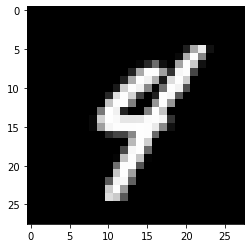

In [117]:
show_image_id(9922)